# Objective:
Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset. 


# Data Preparation and Exploration

In [1]:
import warnings                   # import library warnings
warnings.filterwarnings('ignore')  # it will ignore warnings in the code

In [2]:
import pandas as pd 
df=pd.read_csv(r"exchange_rate.csv",header=0)  # load dataset , 0th row as header
df.head() # top 5 rows

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [3]:
df.shape # rows, columns

(7588, 2)

In [4]:
df.dtypes # data type of each column

date        object
Ex_rate    float64
dtype: object

A date can be written in multiple formats like month-day-year / year-day-month / day-month-year, likewise time can be written in multiple formats like 24 hours / 12 hours. So, we need to make sure that each & every date and time should be written in the same format. We have a function to_datetime() in pandas lib. When we pass 'date' column to this function, it will convert any datetime column into the same format of date & time 

In [5]:
df['date']=pd.to_datetime(df['date']) # convert date column into the same format of date & time

In [6]:
df['date']

0      1990-01-01
1      1990-02-01
2      1990-03-01
3      1990-04-01
4      1990-05-01
          ...    
7583   2010-06-10
7584   2010-07-10
7585   2010-08-10
7586   2010-09-10
7587   2010-10-10
Name: date, Length: 7588, dtype: datetime64[ns]

Let's see from which date our data starts and where it ends. So, for this, we have to check the minimum date & maximum date using the function min() and max()

In [7]:
df['date'].min(),df['date'].max()

(Timestamp('1990-01-01 00:00:00'), Timestamp('2010-12-09 00:00:00'))

dates in 'date' column may not be arranged in order. So, let's arrange them in ascending order using function sort_values()

In [8]:
df=df.sort_values('date',ascending=True)

In [9]:
df

,date,Ex_rate
0,1990-01-01,0.785500
31,1990-01-02,0.750000
59,1990-01-03,0.747100
90,1990-01-04,0.758700
120,1990-01-05,0.785200
...,...,...
7436,2010-12-05,0.760427
7467,2010-12-06,0.756344
7497,2010-12-07,0.765931
7528,2010-12-08,0.767548


In [10]:
df.isnull().sum()  # check null values

date       0
Ex_rate    0
dtype: int64

Let's check how many entries are there for a particular date. Ideally, there should be only one entry for a particular date.

In [11]:
df['date'].value_counts() # for a particular date, how many entries are there

1990-01-01    1
2003-11-03    1
2003-11-15    1
2003-11-14    1
2003-11-13    1
             ..
1996-11-30    1
1996-11-29    1
1996-11-28    1
1996-11-27    1
2010-12-09    1
Name: date, Length: 7588, dtype: int64

In [12]:
df.shape

(7588, 2)

In Time series analysis, date should always be the index column and final data should have only one column which is 'currency rate' column

In [13]:
df=df.set_index('date') # make date column as index column

In [14]:
df # this dataset has currency rate on daily basis 

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.750000
1990-01-03,0.747100
1990-01-04,0.758700
1990-01-05,0.785200
...,...
2010-12-05,0.760427
2010-12-06,0.756344
2010-12-07,0.765931


Let's convert this dataset into a new dataset which is having currency rate on monthly basis using function resample(). Here, we will take the average of the currency rate from day 1 to day 30 and put it as the currency rate of that month.

In [15]:
y=df['Ex_rate'].resample("M").mean() # resampling the data , M stands for Month

In [16]:
y   # this dataset has currency rate on monthly basis 

date
1990-01-31    0.769661
1990-02-28    0.765589
1990-03-31    0.768568
1990-04-30    0.777073
1990-05-31    0.784868
                ...   
2010-08-31    0.752128
2010-09-30    0.742300
2010-10-31    0.749748
2010-11-30    0.753275
2010-12-31    0.752940
Freq: M, Name: Ex_rate, Length: 252, dtype: float64

In [17]:
y.shape # now it's a small dataset, so, we can see the graph easily 

(252,)

<AxesSubplot:xlabel='date'>

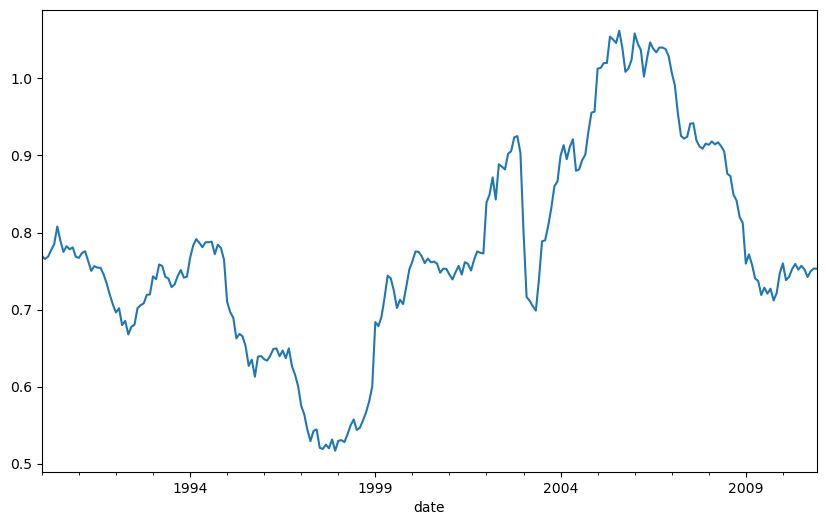

In [18]:
y.plot(figsize=(10,6))

# In time series analysis, manual train & test split is done

In [19]:
#pass any random date to loc attribute. It will help us to get our training data (75% of the data)

train=y.loc[:'2006-01-31'] # all monthly sales till 2006-01-31

In [20]:
train  # training data

date
1990-01-31    0.769661
1990-02-28    0.765589
1990-03-31    0.768568
1990-04-30    0.777073
1990-05-31    0.784868
                ...   
2005-09-30    1.039895
2005-10-31    1.008593
2005-11-30    1.012989
2005-12-31    1.024522
2006-01-31    1.058479
Freq: M, Name: Ex_rate, Length: 193, dtype: float64

In [21]:
train.shape

(193,)

In [22]:
#pass the next monthly sales date to loc attribute. It will give us our testing data
test=y.loc['2006-02-28':] # monthly sales from Feb 2006 till the end

In [23]:
test # test data

date
2006-02-28    1.045187
2006-03-31    1.037033
2006-04-30    1.002541
2006-05-31    1.026014
2006-06-30    1.046767
2006-07-31    1.038611
2006-08-31    1.033899
2006-09-30    1.040167
2006-10-31    1.040041
2006-11-30    1.038154
2006-12-31    1.029047
2007-01-31    1.007658
2007-02-28    0.991338
2007-03-31    0.954403
2007-04-30    0.925435
2007-05-31    0.921861
2007-06-30    0.924323
2007-07-31    0.941323
2007-08-31    0.941858
2007-09-30    0.919757
2007-10-31    0.911645
2007-11-30    0.908845
2007-12-31    0.915313
2008-01-31    0.913868
2008-02-29    0.918222
2008-03-31    0.914468
2008-04-30    0.917070
2008-05-31    0.912014
2008-06-30    0.905207
2008-07-31    0.876278
2008-08-31    0.873203
2008-09-30    0.849151
2008-10-31    0.841488
2008-11-30    0.819933
2008-12-31    0.812384
2009-01-31    0.759558
2009-02-28    0.771566
2009-03-31    0.758480
2009-04-30    0.740351
2009-05-31    0.737160
2009-06-30    0.718903
2009-07-31    0.728414
2009-08-31    0.720648
2009-0

In [24]:
test.shape

(59,)

<AxesSubplot:title={'center':'Average currency rate'}, xlabel='date'>

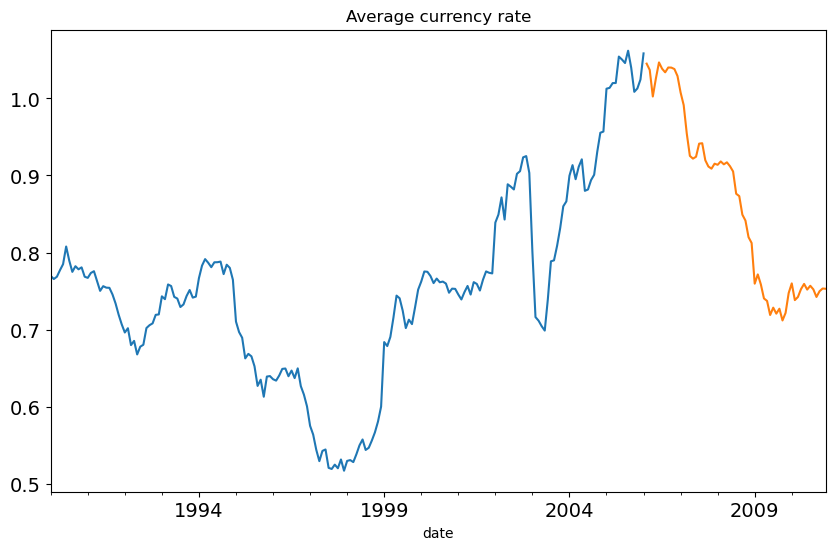

In [25]:
train.plot(figsize=(10,6),title='Average currency rate',fontsize=14) # plot training data (blue)
test.plot(figsize=(10,6),title='Average currency rate',fontsize=14)  # plot test data (orange)

# Model Building - Exponential Smoothing

# Simple Exponential Smoothing Model

In [26]:
#smoothing level=alpha (α)
# α should be in the range of 0 to 1
# α close to 0 indicate that older values are very less imp. compared to the recent values
# α to 1 indicate that older values are equally imp.   
# So, more the α close to 0, less the importance given to older values i.e more the imp. given to recent values. 
# So,α should be low(close to 0) bec. as time goes, the trend of the data also changes ,so, our machine algo. should follow the new data trend
# α should be 0.01, 0.1 but not greater than 0.1  
from statsmodels.tsa.api import SimpleExpSmoothing # α = 0.01 means we are giving more imp. to newer value as compared to older value
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.01) # α = 0.01, pass training data to the function and save in var. fit1
                                                           # fit function train our model

In [27]:
fit1

In [28]:
Exp_Smooth = test.copy()  # copy test data in var. Exp_Smooth

In [29]:
Exp_Smooth

date
2006-02-28    1.045187
2006-03-31    1.037033
2006-04-30    1.002541
2006-05-31    1.026014
2006-06-30    1.046767
2006-07-31    1.038611
2006-08-31    1.033899
2006-09-30    1.040167
2006-10-31    1.040041
2006-11-30    1.038154
2006-12-31    1.029047
2007-01-31    1.007658
2007-02-28    0.991338
2007-03-31    0.954403
2007-04-30    0.925435
2007-05-31    0.921861
2007-06-30    0.924323
2007-07-31    0.941323
2007-08-31    0.941858
2007-09-30    0.919757
2007-10-31    0.911645
2007-11-30    0.908845
2007-12-31    0.915313
2008-01-31    0.913868
2008-02-29    0.918222
2008-03-31    0.914468
2008-04-30    0.917070
2008-05-31    0.912014
2008-06-30    0.905207
2008-07-31    0.876278
2008-08-31    0.873203
2008-09-30    0.849151
2008-10-31    0.841488
2008-11-30    0.819933
2008-12-31    0.812384
2009-01-31    0.759558
2009-02-28    0.771566
2009-03-31    0.758480
2009-04-30    0.740351
2009-05-31    0.737160
2009-06-30    0.718903
2009-07-31    0.728414
2009-08-31    0.720648
2009-0

In [30]:
len(test)   # 59 months

59

In [31]:
#steps=len(test) because we have to compare the predicted currency rate with test value/ actual value 

Exp_Smooth['SES'] = fit1.forecast(steps=len(test)) # predict the currency rate for the given test data using the algorithm  and save in new column 'SES'

In [32]:
Exp_Smooth['SES'] # predicted currency rate is 0.785172 which is same for every month of our testing data

2006-02-28    0.785172
2006-03-31    0.785172
2006-04-30    0.785172
2006-05-31    0.785172
2006-06-30    0.785172
2006-07-31    0.785172
2006-08-31    0.785172
2006-09-30    0.785172
2006-10-31    0.785172
2006-11-30    0.785172
2006-12-31    0.785172
2007-01-31    0.785172
2007-02-28    0.785172
2007-03-31    0.785172
2007-04-30    0.785172
2007-05-31    0.785172
2007-06-30    0.785172
2007-07-31    0.785172
2007-08-31    0.785172
2007-09-30    0.785172
2007-10-31    0.785172
2007-11-30    0.785172
2007-12-31    0.785172
2008-01-31    0.785172
2008-02-29    0.785172
2008-03-31    0.785172
2008-04-30    0.785172
2008-05-31    0.785172
2008-06-30    0.785172
2008-07-31    0.785172
2008-08-31    0.785172
2008-09-30    0.785172
2008-10-31    0.785172
2008-11-30    0.785172
2008-12-31    0.785172
2009-01-31    0.785172
2009-02-28    0.785172
2009-03-31    0.785172
2009-04-30    0.785172
2009-05-31    0.785172
2009-06-30    0.785172
2009-07-31    0.785172
2009-08-31    0.785172
2009-09-30 

<AxesSubplot:title={'center':'Average currency rate'}, xlabel='date'>

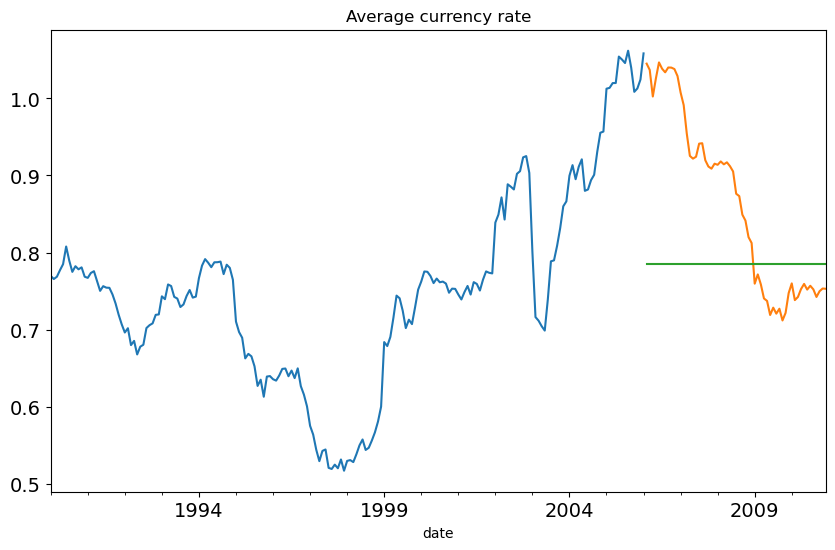

In [33]:
train.plot(figsize=(10,6), title= 'Average currency rate', fontsize=14) # plot training data (blue)
test.plot(figsize=(10,6), title= 'Average currency rate', fontsize=14) # plot test data  (orange)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average currency rate', fontsize=14) # plot predicted currency rate value (green)

predicted currency rate is almost 0.8 which is given by a straight line. As per graph, average currency rate is also 0.8. It means, our simple exponential smoothing model is performing same as the mean model i.e. our model is predicting the same currency rate for each and every data. It shows  simple exponential smoothing model is the worst model in time series analysis. So, let's go for Double Exponential Smoothing (Holt's linear trend Model)

In [34]:
#Model Evaluation
#AIC score is used to determine which machine learning model is best for a given dataset.So, we have to compare the AIC scores of different models. Choose the model with lowest AIC score. It is very useful when we are doing time series analysis
fit1.aic  # calculate AIC score of the simple exponential smoothing model

-817.8760605437936

In [35]:
# calculate RMSE of the model
# RMSE estimates how far the predicted values deviate from the test values(actual values) in the dataset
# choose the model with lowest RMSE score
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Exp_Smooth['SES']))
print(rmse)

0.13952117431258745


# Holt's linear trend Model

In [36]:
#smoothing slope = beta (β) indicates trend in the data (in the range of 0.25 to 0.5)

from statsmodels.tsa.api import Holt # 0.25 is the smoothing slope given to the model 
fit1 = Holt(train).fit(smoothing_level=0.01,smoothing_slope = 0.25) # pass training data to the function and save in var. fit1
                                                                   # fit function train our model

In [37]:
fit1

In [38]:
Holt_df = test.copy() # copy test data in var. Holt_df

In [39]:
Holt_df

date
2006-02-28    1.045187
2006-03-31    1.037033
2006-04-30    1.002541
2006-05-31    1.026014
2006-06-30    1.046767
2006-07-31    1.038611
2006-08-31    1.033899
2006-09-30    1.040167
2006-10-31    1.040041
2006-11-30    1.038154
2006-12-31    1.029047
2007-01-31    1.007658
2007-02-28    0.991338
2007-03-31    0.954403
2007-04-30    0.925435
2007-05-31    0.921861
2007-06-30    0.924323
2007-07-31    0.941323
2007-08-31    0.941858
2007-09-30    0.919757
2007-10-31    0.911645
2007-11-30    0.908845
2007-12-31    0.915313
2008-01-31    0.913868
2008-02-29    0.918222
2008-03-31    0.914468
2008-04-30    0.917070
2008-05-31    0.912014
2008-06-30    0.905207
2008-07-31    0.876278
2008-08-31    0.873203
2008-09-30    0.849151
2008-10-31    0.841488
2008-11-30    0.819933
2008-12-31    0.812384
2009-01-31    0.759558
2009-02-28    0.771566
2009-03-31    0.758480
2009-04-30    0.740351
2009-05-31    0.737160
2009-06-30    0.718903
2009-07-31    0.728414
2009-08-31    0.720648
2009-0

In [40]:
#steps=len(test) because we have to compare the predicted sales with test value/ actual value 

Holt_df['Holt_linear'] = fit1.forecast(steps=len(test)) #predict the sales for the given test data using the algorithm  and save in new column 'Holt_linear'

In [41]:
Holt_df['Holt_linear'] # predicted currency rate for every month of our testing data

2006-02-28    1.082498
2006-03-31    1.087090
2006-04-30    1.091682
2006-05-31    1.096274
2006-06-30    1.100866
2006-07-31    1.105458
2006-08-31    1.110051
2006-09-30    1.114643
2006-10-31    1.119235
2006-11-30    1.123827
2006-12-31    1.128419
2007-01-31    1.133011
2007-02-28    1.137603
2007-03-31    1.142195
2007-04-30    1.146787
2007-05-31    1.151379
2007-06-30    1.155971
2007-07-31    1.160564
2007-08-31    1.165156
2007-09-30    1.169748
2007-10-31    1.174340
2007-11-30    1.178932
2007-12-31    1.183524
2008-01-31    1.188116
2008-02-29    1.192708
2008-03-31    1.197300
2008-04-30    1.201892
2008-05-31    1.206485
2008-06-30    1.211077
2008-07-31    1.215669
2008-08-31    1.220261
2008-09-30    1.224853
2008-10-31    1.229445
2008-11-30    1.234037
2008-12-31    1.238629
2009-01-31    1.243221
2009-02-28    1.247813
2009-03-31    1.252405
2009-04-30    1.256998
2009-05-31    1.261590
2009-06-30    1.266182
2009-07-31    1.270774
2009-08-31    1.275366
2009-09-30 

<AxesSubplot:title={'center':'Average currency rate'}, xlabel='date'>

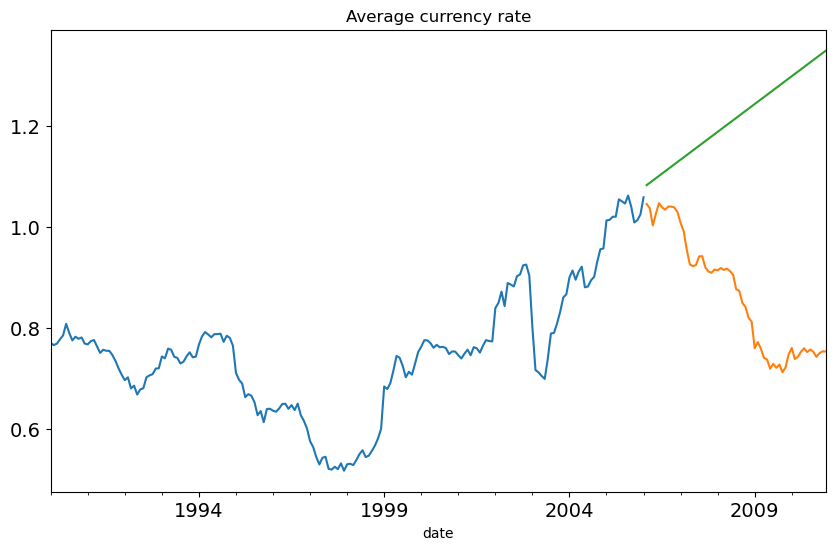

In [42]:
train.plot(figsize=(10,6), title= 'Average currency rate', fontsize=14) # plot training data (blue)
test.plot(figsize=(10,6), title= 'Average currency rate', fontsize=14) # plot test data (orange)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average currency rate', fontsize=14) # plot predicted currency rate (green)

Here, we can see a straight line with some slope. It means, our model took trend into consideration and this trend is going upward.

our double smoothing model doesn't predicting value even close to the actual test value. So, our model is not performing good but it's better than simple exponential smoothing model.

Here, we can observe currency rate went to the peak after every 6 years. So, I can say after every 6 years, there is a seasonality pattern. So, if we add one more hyperparameter which is seasonality parameter , our model can perform better than the previous two models. So, let's go for Triple Exponential Smoothing model (Holt's Winter Model)

In [43]:
#Model Evaluation
fit1.aic  # calculate AIC score of the double smoothing  model

-887.2632761376793

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_df['Holt_linear']))
print(rmse)

0.3986026521833941


# Holt's Winter Model

In [45]:
#seasonal period=72 months (6x12)
# pass training data to the function and save in var. fit1
# fit function train our model
from statsmodels.tsa.api import ExponentialSmoothing
fit1 = ExponentialSmoothing(train , seasonal_periods=72,trend='add',seasonal='add').fit()

In [46]:
fit1

In [47]:
Holt_Winter_df = test.copy() # copy test data

In [48]:
Holt_Winter_df

date
2006-02-28    1.045187
2006-03-31    1.037033
2006-04-30    1.002541
2006-05-31    1.026014
2006-06-30    1.046767
2006-07-31    1.038611
2006-08-31    1.033899
2006-09-30    1.040167
2006-10-31    1.040041
2006-11-30    1.038154
2006-12-31    1.029047
2007-01-31    1.007658
2007-02-28    0.991338
2007-03-31    0.954403
2007-04-30    0.925435
2007-05-31    0.921861
2007-06-30    0.924323
2007-07-31    0.941323
2007-08-31    0.941858
2007-09-30    0.919757
2007-10-31    0.911645
2007-11-30    0.908845
2007-12-31    0.915313
2008-01-31    0.913868
2008-02-29    0.918222
2008-03-31    0.914468
2008-04-30    0.917070
2008-05-31    0.912014
2008-06-30    0.905207
2008-07-31    0.876278
2008-08-31    0.873203
2008-09-30    0.849151
2008-10-31    0.841488
2008-11-30    0.819933
2008-12-31    0.812384
2009-01-31    0.759558
2009-02-28    0.771566
2009-03-31    0.758480
2009-04-30    0.740351
2009-05-31    0.737160
2009-06-30    0.718903
2009-07-31    0.728414
2009-08-31    0.720648
2009-0

In [49]:
#steps=len(test) because we have to compare the predicted sales with test value/ actual value 
#predict the sales for the given test data using the algorithm  and save in new column 

Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

In [50]:
Holt_Winter_df['Holt_Winter']

2006-02-28    1.075444
2006-03-31    1.081771
2006-04-30    1.078863
2006-05-31    1.073673
2006-06-30    1.081921
2006-07-31    1.081718
2006-08-31    1.084687
2006-09-30    1.077349
2006-10-31    1.079503
2006-11-30    1.082092
2006-12-31    1.076241
2007-01-31    1.047518
2007-02-28    1.039508
2007-03-31    1.042620
2007-04-30    1.035108
2007-05-31    1.034289
2007-06-30    1.042589
2007-07-31    1.036773
2007-08-31    1.021605
2007-09-30    1.034516
2007-10-31    1.030673
2007-11-30    1.044603
2007-12-31    1.046257
2008-01-31    1.078993
2008-02-29    1.082888
2008-03-31    1.095878
2008-04-30    1.094385
2008-05-31    1.114763
2008-06-30    1.120326
2008-07-31    1.117707
2008-08-31    1.118532
2008-09-30    1.128575
2008-10-31    1.127668
2008-11-30    1.127572
2008-12-31    1.113310
2009-01-31    1.072381
2009-02-28    1.044587
2009-03-31    1.039348
2009-04-30    1.029876
2009-05-31    1.030212
2009-06-30    1.048457
2009-07-31    1.058303
2009-08-31    1.060223
2009-09-30 

<AxesSubplot:title={'center':'Average currency rate'}, xlabel='date'>

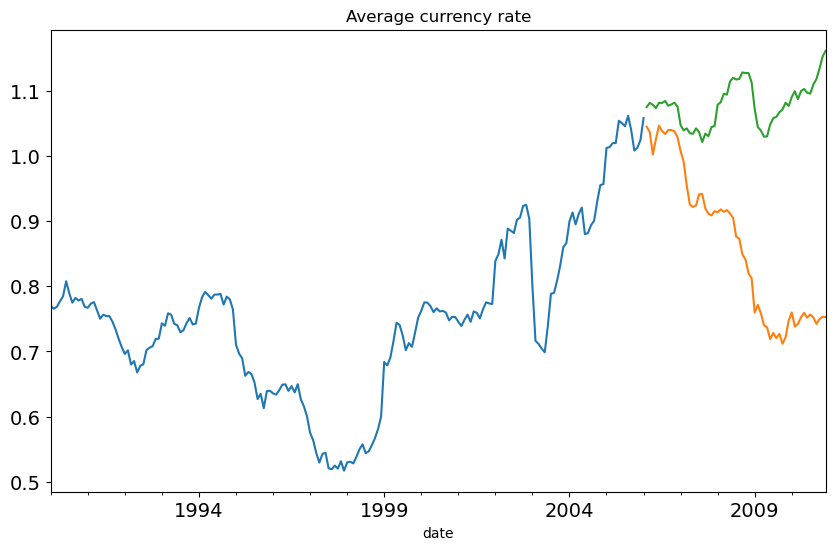

In [51]:
train.plot(figsize=(10,6), title= 'Average currency rate', fontsize=14) # plot training data (blue)
test.plot(figsize=(10,6), title= 'Average currency rate', fontsize=14) # plot test data (orange)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average currency rate', fontsize=14) # plot predicted currency rate (green)

Now, predicted values are slightly close to the test value. Our Holt-Winter Model is performing better than previous models bec. we added seasonality in the dataset.

In [52]:
#Model Evaluation
fit1.aic  # calculate AIC score of the Holt-Winter Model 

-1484.729065881937

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_Winter_df['Holt_Winter']))
print(rmse)

0.2482983727202625


Insight:

Holt-Winter Model has the lowest AIC score which is -1484. Therefore, it is the best model out of the three models. So, use this model for making predictions

# Use Holt-Winter Model to do currency rate predictions for the upcoming one year.
We already have the dataset y having currency rate on monthly basis. So, first train the entire data(y) which is from 1st Jan 1990 to 31st Dec 2010 and then predict the currency rate for the upcoming one year i.e. from 1st Jan 2011 to 31st Dec 2011

In [54]:
#seasonalperiods = gamma(γ)
#seasonal period=12 months 
# pass the entire dataset to the function and save in var. fit1
# fit function train our model

from statsmodels.tsa.api import ExponentialSmoothing
fit1 = ExponentialSmoothing(y, seasonal_periods=12,trend='add', seasonal='add').fit()

In [55]:
fit1

In [56]:
#predict the currency rate for the upcoming one year using the algorithm
#steps= 12 because we have to predict the currency rate for the upcoming one year / 12 months

Y_predictions = fit1.forecast(steps=12)

In [57]:
Y_predictions # these are the predicted currency rate from 1st Jan 2011 to 31st Dec 2011

2011-01-31    0.755936
2011-02-28    0.750474
2011-03-31    0.747643
2011-04-30    0.742629
2011-05-31    0.746557
2011-06-30    0.747784
2011-07-31    0.744289
2011-08-31    0.742451
2011-09-30    0.742607
2011-10-31    0.740723
2011-11-30    0.744608
2011-12-31    0.743214
Freq: M, dtype: float64

<AxesSubplot:title={'center':'Average currency rate'}, xlabel='date'>

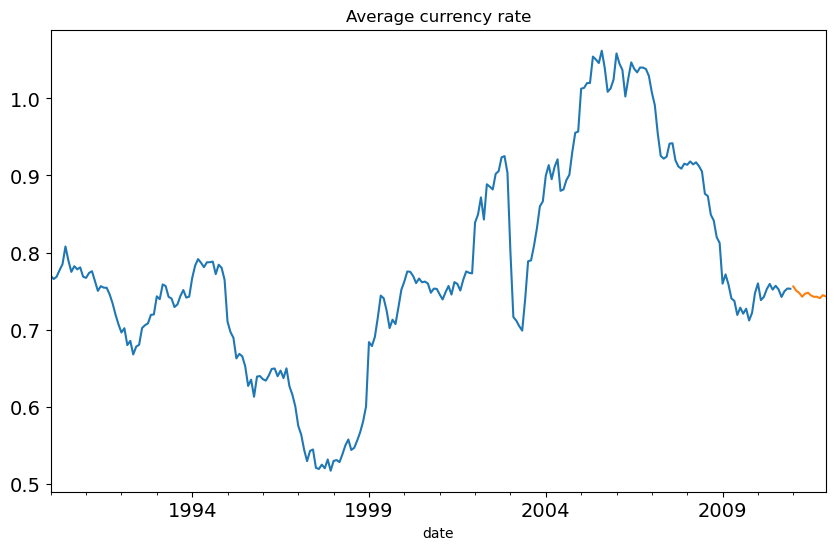

In [58]:
y.plot(figsize=(10,6), title= 'Average currency rate', fontsize=14) # plot the data (blue)
Y_predictions.plot(figsize=(10,6), title= 'Average currency rate', fontsize=14) # plot predicted currency rate(orange)

In [59]:
#Model Evaluation
fit1.aic  # calculate AIC score of the model

-1972.0000235813159

# Model Building - ARIMA

Box-Jenkins Method is used to build the best ARIMA model using the optimum values of p,d,q 


ARIMA model has p,d,q as hyperparameters => when we pass our dataset and p,d,q to auto_arima() function, this function goes to the entire dataset multiple times and calculates different values of p,d,q each time. This function finds the optimum values of p,d,q i.e. best ARIMA values for a particular dataset. We can build the best ARIMA model if we have the best values of p,d,q 

In [60]:
# this code will give the optimum values of p,d,q
import pmdarima as pm
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=72, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[72] intercept   : AIC=-1272.144, Time=0.34 sec
 ARIMA(1,1,0)(1,0,0)[72] intercept   : AIC=-1290.551, Time=8.01 sec
 ARIMA(0,1,1)(0,0,1)[72] intercept   : AIC=-1287.812, Time=7.39 sec
 ARIMA(0,1,0)(0,0,0)[72]             : AIC=-1274.141, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[72] intercept   : AIC=-1286.015, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[72] intercept   : AIC=-1288.776, Time=44.27 sec
 ARIMA(1,1,0)(1,0,1)[72] intercept   : AIC=-1288.511, Time=8.46 sec
 ARIMA(1,1,0)(0,0,1)[72] intercept   : AIC=-1290.189, Time=7.36 sec
 ARIMA(1,1,0)(2,0,1)[72] intercept   : AIC=-1286.780, Time=49.06 sec
 ARIMA(0,1,0)(1,0,0)[72] intercept   : AIC=-1279.425, Time=3.74 sec
 ARIMA(2,1,0)(1,0,0)[72] intercept   : AIC=-1290.571, Time=7.43 sec
 ARIMA(2,1,0)(0,0,0)[72] intercept   : AIC=-1287.178, Time=0.22 sec
 ARIMA(2,1,0)(2,0,0)[72] intercept   : AIC=-1288.793, Time=52.31 sec
 ARIMA(2,1,0)(1,0,1)[72] intercept   : AIC=-1288.545, Time=9.47 sec
 A

ARIMA(p,d,q)(p,d,q)[period of seasonality in months]

1,1,1 is trend order given by p,d,q values

1,0,0,72 is seasonal order given by p,d,q values and period of seasonality

In [61]:
#Model Evaluation
model.aic()  # calculate AIC score of the ARIMA model

-1292.9796809040463

In [62]:
# pass the optimum values of trend order and seasonal order to the SARIMAX func and then train the ARIMA model
# first take the training data which is from 1st Jan 1990 to 31st Jan 2006 and then predict the currency rate from 1st Feb 2006 to 31st Dec 2010
from statsmodels.tsa.statespace.sarimax import SARIMAX  # Seasonal ARIMA
model = SARIMAX(train, order=(1,1,1),seasonal_order=(1,0,0,72)).fit()

In [63]:
model

In [64]:
#predict the currency rate using the ARIMA algorithm

pred = model.get_forecast(steps=len(test))

In [65]:
pred # it has the predicted currency rate from 1st Feb 2006 to 31st Dec 2010

In [66]:
pred.predicted_mean

2006-02-28    1.068583
2006-03-31    1.072462
2006-04-30    1.073420
2006-05-31    1.072632
2006-06-30    1.074522
2006-07-31    1.073833
2006-08-31    1.074208
2006-09-30    1.073756
2006-10-31    1.071270
2006-11-30    1.072433
2006-12-31    1.072383
2007-01-31    1.070834
2007-02-28    1.069457
2007-03-31    1.071506
2007-04-30    1.073212
2007-05-31    1.070828
2007-06-30    1.074272
2007-07-31    1.073771
2007-08-31    1.071943
2007-09-30    1.074951
2007-10-31    1.077251
2007-11-30    1.076865
2007-12-31    1.076693
2008-01-31    1.090806
2008-02-29    1.093021
2008-03-31    1.097792
2008-04-30    1.091648
2008-05-31    1.101434
2008-06-30    1.100774
2008-07-31    1.099998
2008-08-31    1.104336
2008-09-30    1.105079
2008-10-31    1.108911
2008-11-30    1.109259
2008-12-31    1.104587
2009-01-31    1.082698
2009-02-28    1.064574
2009-03-31    1.063573
2009-04-30    1.062048
2009-05-31    1.060826
2009-06-30    1.069502
2009-07-31    1.080046
2009-08-31    1.080324
2009-09-30 

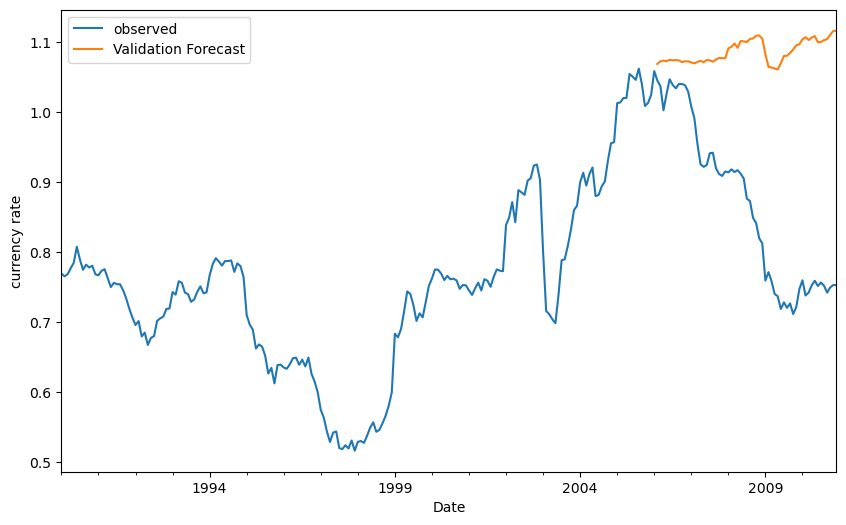

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
ax = y['1990':].plot(label='observed') # 1990 to till the end 
pred.predicted_mean.plot(ax=ax, label='Validation Forecast') # from 1st Feb 2006 to 31st Dec 2010
ax.set_xlabel('Date')
ax.set_ylabel('currency rate')
plt.legend()
plt.show()

In [68]:
Y_pred = pred.predicted_mean

In [69]:
Y_pred # predicted currency rate from 1st Feb 2006 to 31st Dec 2010

2006-02-28    1.068583
2006-03-31    1.072462
2006-04-30    1.073420
2006-05-31    1.072632
2006-06-30    1.074522
2006-07-31    1.073833
2006-08-31    1.074208
2006-09-30    1.073756
2006-10-31    1.071270
2006-11-30    1.072433
2006-12-31    1.072383
2007-01-31    1.070834
2007-02-28    1.069457
2007-03-31    1.071506
2007-04-30    1.073212
2007-05-31    1.070828
2007-06-30    1.074272
2007-07-31    1.073771
2007-08-31    1.071943
2007-09-30    1.074951
2007-10-31    1.077251
2007-11-30    1.076865
2007-12-31    1.076693
2008-01-31    1.090806
2008-02-29    1.093021
2008-03-31    1.097792
2008-04-30    1.091648
2008-05-31    1.101434
2008-06-30    1.100774
2008-07-31    1.099998
2008-08-31    1.104336
2008-09-30    1.105079
2008-10-31    1.108911
2008-11-30    1.109259
2008-12-31    1.104587
2009-01-31    1.082698
2009-02-28    1.064574
2009-03-31    1.063573
2009-04-30    1.062048
2009-05-31    1.060826
2009-06-30    1.069502
2009-07-31    1.080046
2009-08-31    1.080324
2009-09-30 

In [70]:
Y_test = y['2006-02-28':]

In [71]:
Y_test

date
2006-02-28    1.045187
2006-03-31    1.037033
2006-04-30    1.002541
2006-05-31    1.026014
2006-06-30    1.046767
2006-07-31    1.038611
2006-08-31    1.033899
2006-09-30    1.040167
2006-10-31    1.040041
2006-11-30    1.038154
2006-12-31    1.029047
2007-01-31    1.007658
2007-02-28    0.991338
2007-03-31    0.954403
2007-04-30    0.925435
2007-05-31    0.921861
2007-06-30    0.924323
2007-07-31    0.941323
2007-08-31    0.941858
2007-09-30    0.919757
2007-10-31    0.911645
2007-11-30    0.908845
2007-12-31    0.915313
2008-01-31    0.913868
2008-02-29    0.918222
2008-03-31    0.914468
2008-04-30    0.917070
2008-05-31    0.912014
2008-06-30    0.905207
2008-07-31    0.876278
2008-08-31    0.873203
2008-09-30    0.849151
2008-10-31    0.841488
2008-11-30    0.819933
2008-12-31    0.812384
2009-01-31    0.759558
2009-02-28    0.771566
2009-03-31    0.758480
2009-04-30    0.740351
2009-05-31    0.737160
2009-06-30    0.718903
2009-07-31    0.728414
2009-08-31    0.720648
2009-0

In [72]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

0.2529219370001994


# Use ARIMA Model to do currency rate predictions for the upcoming one year
We already have the dataset y having currency rate on monthly basis. So, first train the entire data(y) which is from 1st Jan 1990 to 31st Dec 2010 and then predict the currency rate for the upcoming one year i.e. from 1st Jan 2011 to 31st Dec 2011

In [73]:
# pass the entire dataset to the function 
# fit function train our model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y, order=(1,1,1),seasonal_order=(1,0,0,72)).fit()

In [74]:
model

In [75]:
#predict the currency rate for the upcoming one year using the algorithm
#steps= 12 because we have to predict the currency rate for the upcoming one year / 12 months

pred = model.get_forecast(steps=12)

In [76]:
pred  #it has the predicted currency rate for upcoming one year ie. from 1st Jan 2011 to 31st Dec 2011

In [77]:
pred.predicted_mean

2011-01-31    0.761384
2011-02-28    0.761388
2011-03-31    0.762245
2011-04-30    0.762194
2011-05-31    0.767518
2011-06-30    0.766895
2011-07-31    0.766160
2011-08-31    0.768647
2011-09-30    0.765189
2011-10-31    0.760288
2011-11-30    0.760972
2011-12-31    0.762774
Freq: M, Name: predicted_mean, dtype: float64

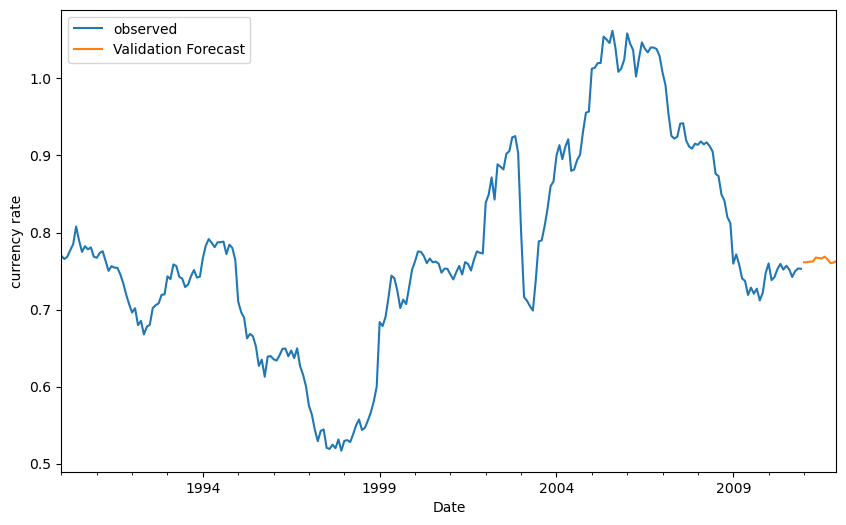

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
ax = y['1990':].plot(label='observed') # 1990 to till the end 
pred.predicted_mean.plot(ax=ax, label='Validation Forecast') # from 1st Jan 2011 to 31st Dec 2011
ax.set_xlabel('Date')
ax.set_ylabel('currency rate')
plt.legend()
plt.show()

Conclusion:

ARIMA model is fast and automated as compared to exponential smoothing where we have to think of particular trend and seasonality. ARIMA is automated which directly gives the best values of trend and seasonality. Hence, ARIMA model perform better than exponential smoothing model
    